In [5]:
import os # like here() in R
import rioxarray as rioxr
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

In [2]:
# read in data
lulc = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data', 'land_cover.tif'))
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

<AxesSubplot:>

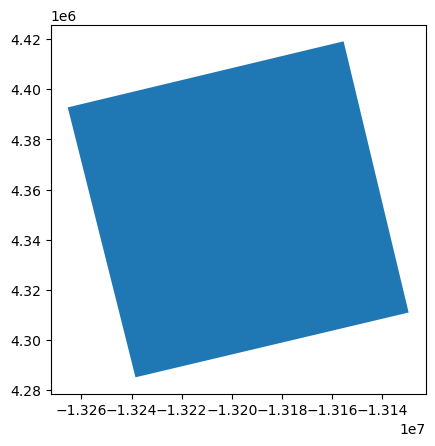

In [11]:
# create bounding box from original lulc
bbox = gpd.GeoDataFrame(geometry = [box(*lulc.rio.bounds())],
                 crs = lulc.rio.crs)

# convert bbox to CA crs and plot
# notice the bbox of the original raster is now rotated in the new crs
bbox_cacrs = bbox.to_crs(ca.crs)
bbox_cacrs.plot()

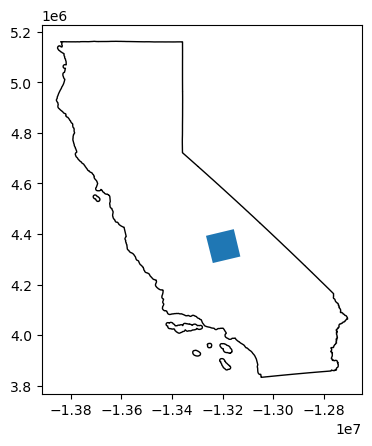

In [10]:
# plot CA and bbox (all in ca crs)
fig, ax = plt.subplots()

ca.plot(ax=ax, 
        color = 'none',
        edgecolor ='black')

bbox_cacrs.plot(ax=ax)

plt.show()

<AxesSubplot:>

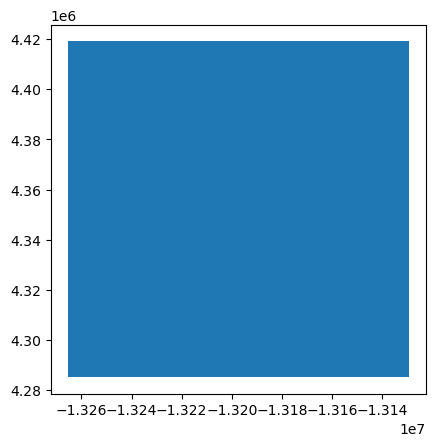

In [13]:
# reproject raster, then get bounding box

lulc_cacrs = lulc.rio.reproject(ca.crs)
bbox_reprojected = gpd.GeoDataFrame(geometry = [box(*lulc_cacrs.rio.bounds())],
                 crs = lulc_cacrs.rio.crs)

# notie the bounding box of the reprojected raster is "non-rotated" square
# this is because is taking the bounding box of the rotated raster
bbox_reprojected.plot()

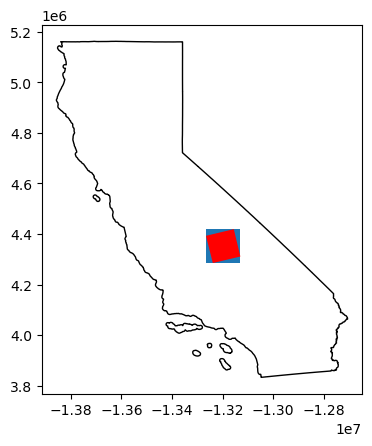

In [14]:
# plot CA and bbox (all in ca crs)
fig, ax = plt.subplots()

ca.plot(ax=ax, 
        color = 'none',
        edgecolor ='black')

# bounding box of reprojected raster contains bounding box of raster
bbox_reprojected.plot(ax=ax)
bbox_cacrs.plot(ax=ax, color='red')

plt.show()

When you reproject the raster its bounding box changes (the smalles box that contains all the data changes). 